# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle, os
from IPython.display import clear_output

In [2]:
from tqdm.auto import tqdm, trange
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\ailab\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
pd.options.display.max_colwidth = None

from dsutils import *

Using TensorFlow backend.


# Data

In [4]:
data = pd.read_csv('data.csv')

# Vectorizisation

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True)
vector = vectorizer.fit_transform(data['Text'].astype(str))

y = data['Spam'].astype('int').values

print('X shape', vector.shape)
print('Y shape', y.shape)

X shape (31730, 282252)
Y shape (31730,)


# Machine Learning

In [6]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier

## Multinomial NB


Mean Loss 0.6879609202647337 +- 0.004956021767437483


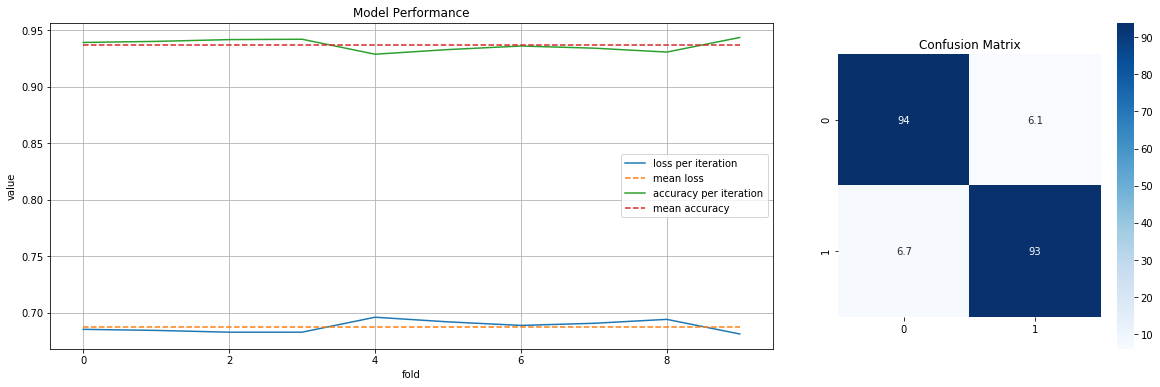

In [7]:
model = MultinomialNB()
mnb_performance, mnb_cm, mnb_model = train_model_on_vects(model, vector, y, oversample='smote')
print('Mean Loss', np.mean(mnb_performance['loss']), '+-', np.std(mnb_performance['loss']))

## Bernoulli NB


Mean Loss 0.7631894106523794 +- 0.00426851634499517


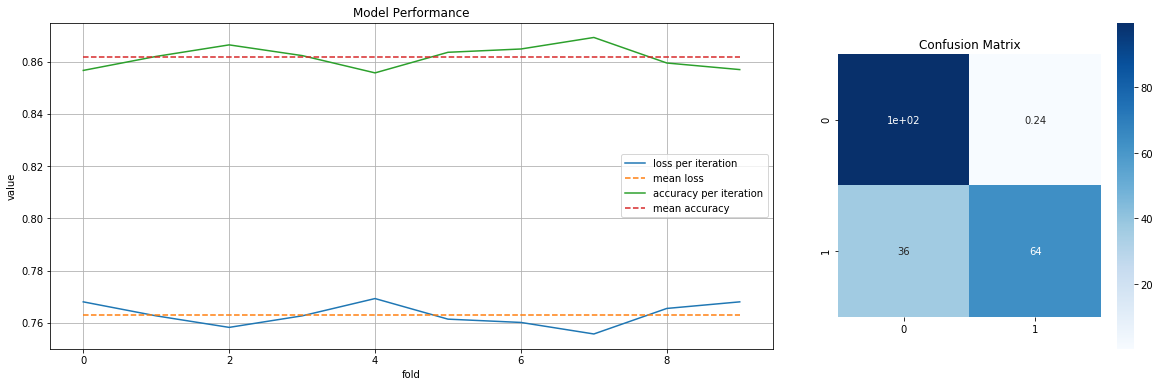

In [8]:
model = BernoulliNB()
bnb_performance, bnb_cm, bnb_model = train_model_on_vects(model, vector, y, oversample='smote')
print('Mean Loss', np.mean(bnb_performance['loss']), '+-', np.std(bnb_performance['loss']))

## Logistic Regression


Mean Loss 0.6583674755751655 +- 0.002758317867890441


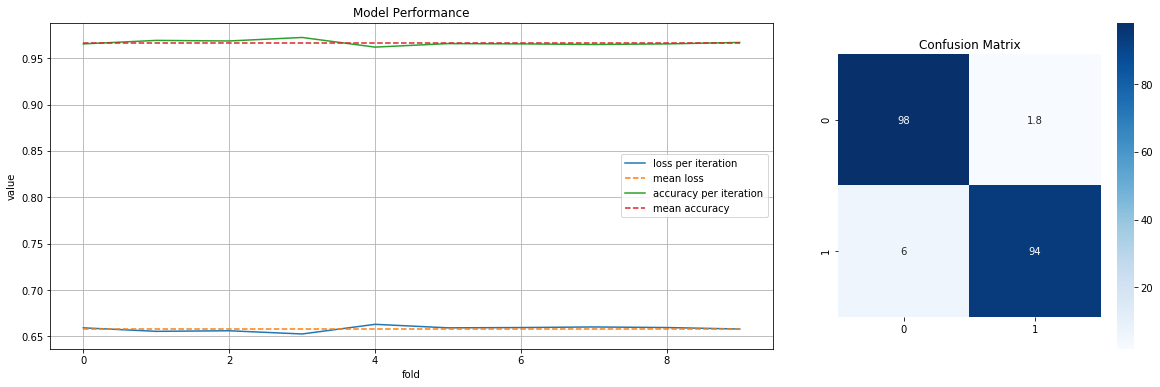

In [9]:
model = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000, random_state=101, warm_start=True)
lr1_performance, lr1_cm, lr1_model = train_model_on_vects(model, vector, y, oversample='smote')
print('Mean Loss', np.mean(lr1_performance['loss']), '+-', np.std(lr1_performance['loss']))


Mean Loss 0.6541128269776237 +- 0.0023929277368708868


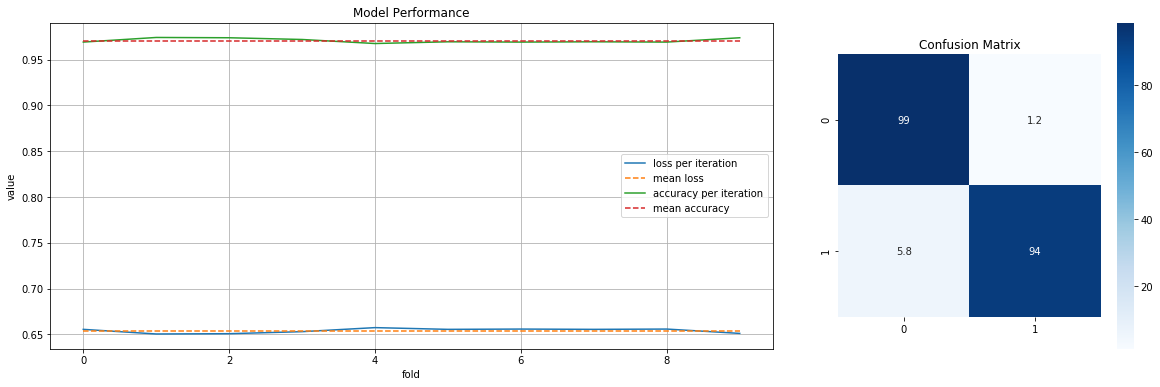

In [10]:
model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=101, warm_start=True)
lr2_performance, lr2_cm, lr2_model = train_model_on_vects(model, vector, y, oversample='smote')
print('Mean Loss', np.mean(lr2_performance['loss']), '+-', np.std(lr2_performance['loss']))

## SGD Classifier - log loss


Mean Loss 0.6753230381342578 +- 0.003828373057437173


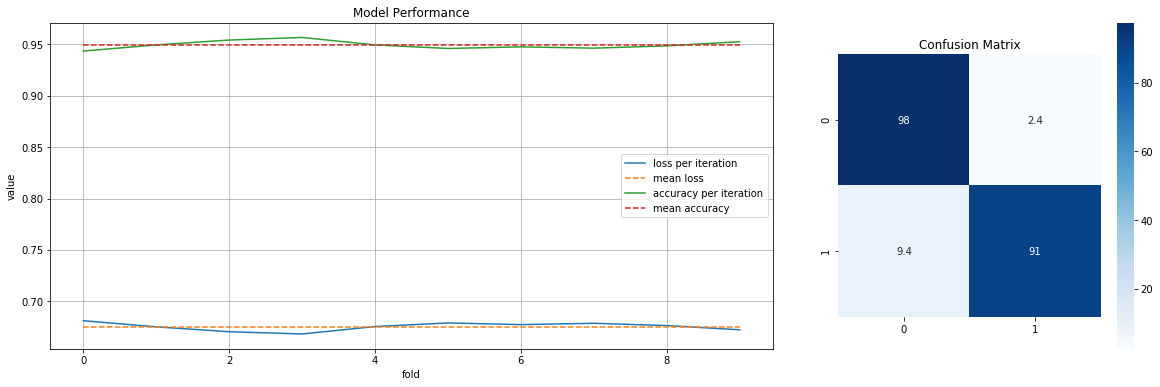

In [11]:
model = SGDClassifier(loss='log', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True)
sgdl1_performance, sgdl1_cm, sgdl1_model = train_model_on_vects(model, vector, y, oversample='smote')
print('Mean Loss', np.mean(sgdl1_performance['loss']), '+-', np.std(sgdl1_performance['loss']))


Mean Loss 0.6619918058619603 +- 0.0022997982223962013


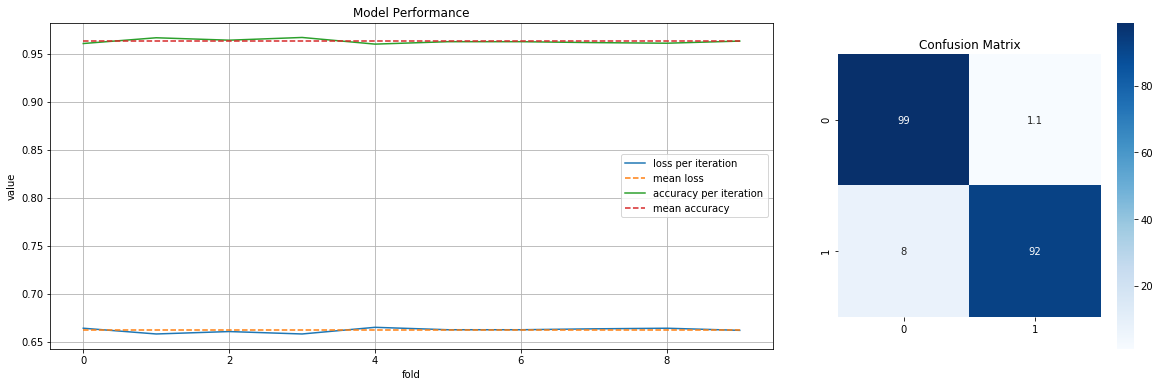

In [12]:
model = SGDClassifier(loss='log', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True)
sgdl2_performance, sgdl2_cm, sgdl2_model = train_model_on_vects(model, vector, y, oversample='smote')
print('Mean Loss', np.mean(sgdl2_performance['loss']), '+-', np.std(sgdl2_performance['loss']))

## SGD Classifier - hinge loss


Mean Loss 0.6666246454459502 +- 0.003851652346032705


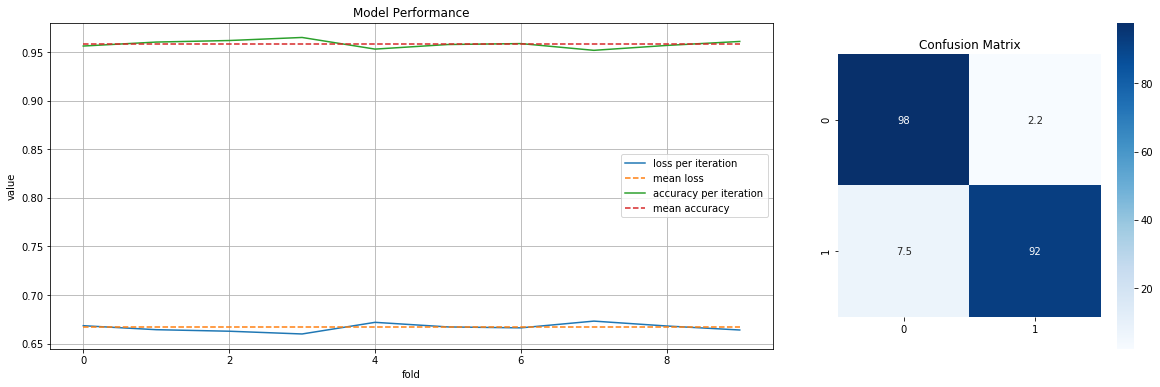

In [13]:
model = SGDClassifier(loss='hinge', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True)
sgdh1_performance, sgdh1_cm, sgdh1_model = train_model_on_vects(model, vector, y, oversample='smote')
print('Mean Loss', np.mean(sgdh1_performance['loss']), '+-', np.std(sgdh1_performance['loss']))


Mean Loss 0.6510557831705011 +- 0.0028531913766798155


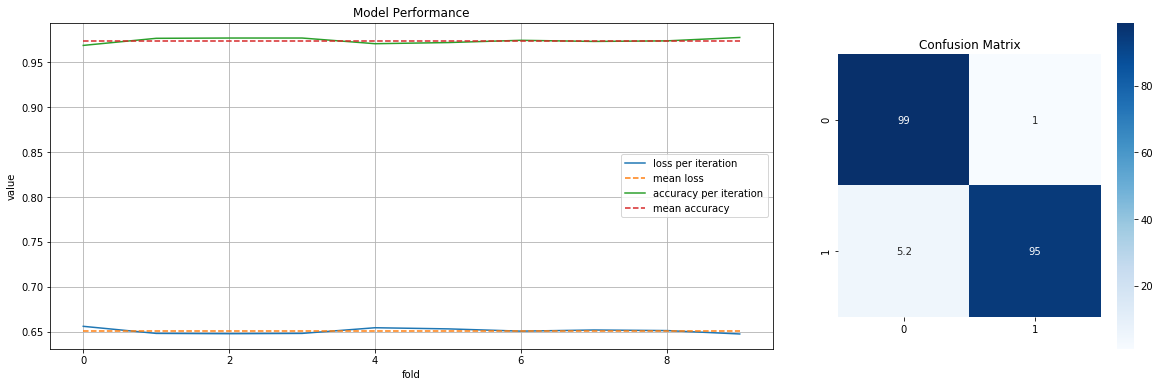

In [14]:
model = SGDClassifier(loss='hinge', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True)
sgdh2_performance, sgdh2_cm, sgdh2_model = train_model_on_vects(model, vector, y, oversample='smote')
print('Mean Loss', np.mean(sgdh2_performance['loss']), '+-', np.std(sgdh2_performance['loss']))

## SGD Classifier - perceptron loss


Mean Loss 0.7114717932555941 +- 0.009053629008649998


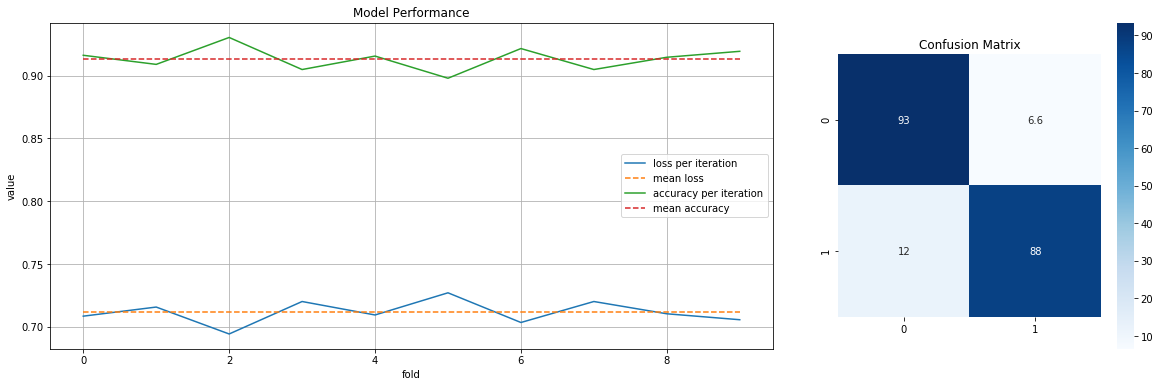

In [15]:
model = SGDClassifier(loss='perceptron', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True)
sgdp1_performance, sgdp1_cm, sgdp1_model = train_model_on_vects(model, vector, y, oversample='smote')
print('Mean Loss', np.mean(sgdp1_performance['loss']), '+-', np.std(sgdp1_performance['loss']))


Mean Loss 0.6535140245824141 +- 0.0022070143586525935


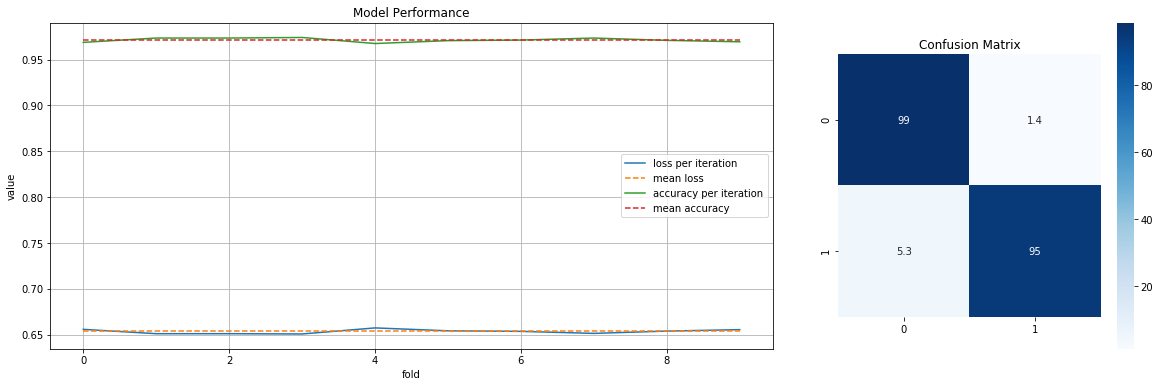

In [16]:
model = SGDClassifier(loss='perceptron', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True)
sgdp2_performance, sgdp2_cm, sgdp2_model = train_model_on_vects(model, vector, y, oversample='smote')
print('Mean Loss', np.mean(sgdp2_performance['loss']), '+-', np.std(sgdp2_performance['loss']))

## Decision Tree


Mean Loss 0.6733690513709425 +- 0.0034500932072874927


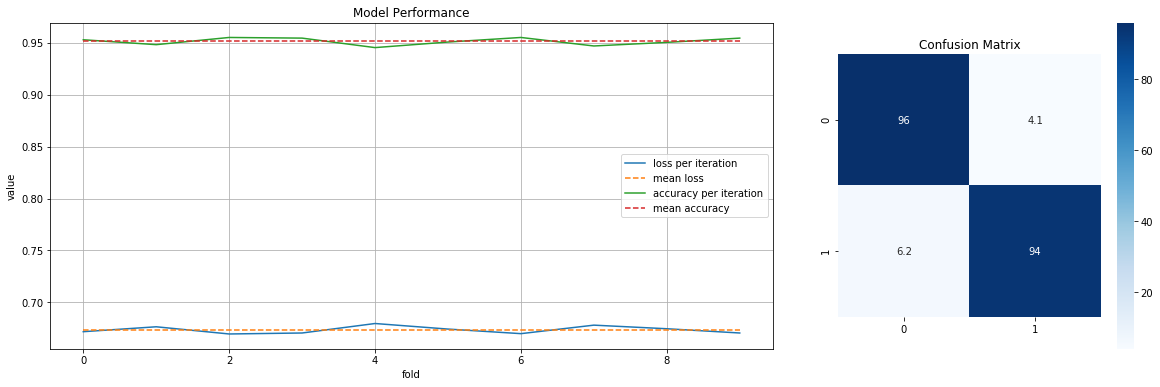

In [17]:
model = DecisionTreeClassifier(random_state=101)
dt_performance, dt_cm, dt_model = train_model_on_vects(model, vector, y, oversample='smote')
print('Mean Loss', np.mean(dt_performance['loss']), '+-', np.std(dt_performance['loss']))

# Comparison

In [18]:
cm = [
    mnb_cm, bnb_cm, lr1_cm, lr2_cm, sgdl1_cm, sgdl2_cm, sgdh1_cm, sgdh2_cm, sgdp1_cm, sgdp2_cm, dt_cm
]

model = [
    'MultinomialNB', 'BernoulliNB', 'LogisticRegression1', 'LogisticRegression2', 'SGDClassifierL1', 'SGDClassifierL2',
    'SGDClassifierH1', 'SGDClassifierH2', 'SGDClassifierP1', 'SGDClassifierP2', 'DecisionTreeClassifier'
]

performance = pd.DataFrame({
    'FP': [x[0][1] for x in cm],
    'FN': [x[1][0] for x in cm]
}, index=model)

In [19]:
performance

,FP,FN
MultinomialNB,6.097655,6.662165
BernoulliNB,0.242093,36.469798
LogisticRegression1,1.765237,5.990073
LogisticRegression2,1.190271,5.813701
SGDClassifierL1,2.436027,9.392439
SGDClassifierL2,1.134802,8.006407
SGDClassifierH1,2.163669,7.527464
SGDClassifierH2,1.044013,5.242329
SGDClassifierP1,6.606916,12.080675
SGDClassifierP2,1.386951,5.326299


# Voting Classifier


Mean Loss 0.651402458241412 +- 0.0017114622101967257


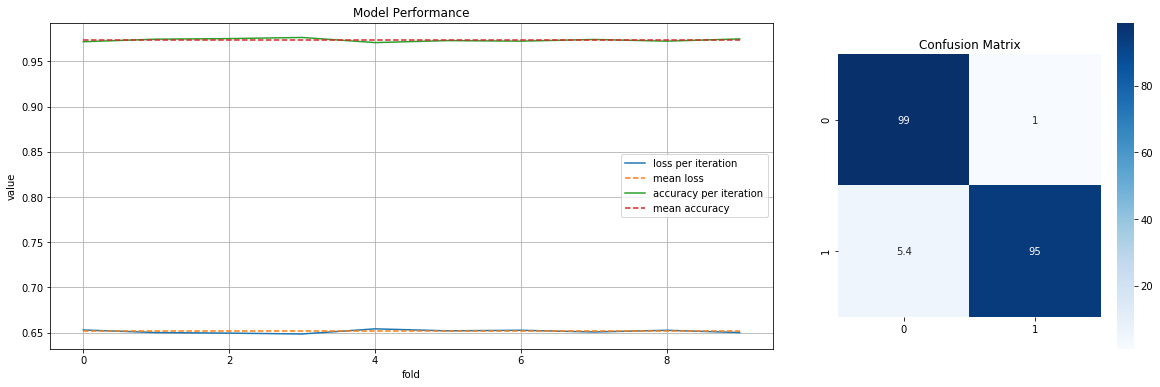

In [20]:
model = VotingClassifier(estimators=[
    ('MNB', MultinomialNB()),
    ('LR-1', LogisticRegression(solver='liblinear', max_iter=100000, class_weight='balanced', random_state=101, 
                                warm_start=True)),
    ('LR-2', LogisticRegression(solver='lbfgs', max_iter=100000, class_weight='balanced', random_state=101, warm_start=True)),
    ('SGD-L1', SGDClassifier(loss='log', max_iter=100000, tol=0.001, penalty='l1', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-L2', SGDClassifier(loss='log', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-H1', SGDClassifier(loss='hinge', max_iter=100000, tol=0.001, penalty='l1', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-H2', SGDClassifier(loss='hinge', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-P2', SGDClassifier(loss='perceptron', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True,
                             class_weight='balanced', early_stopping=True)),
    ('DT', DecisionTreeClassifier(random_state=101)),
], weights=[1.2, 1.2, 2.1, 0.7, 1, 0.8, 3, 4.8, 1.65])
v_performance, v_cm, v_model = train_model_on_vects(model, vector, y, oversample='smote')
print('Mean Loss', np.mean(v_performance['loss']), '+-', np.std(v_performance['loss']))

In [21]:
pickle.dump(vectorizer, open('Vectorizer-spam-3.pkl', 'wb'))

In [22]:
pickle.dump(v_model, open('SpamClassifier-3.pkl', 'wb'))